## Simple Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
negclass=len(pima[pima['label']==0])
posclass=len(pima[pima['label']==1])
print("0 class: ",negclass," 1 class: ",posclass)

0 class:  500  1 class:  268


In [5]:
#seperate into y variable and x variables
features=['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X=pima[features]
Y=pima['label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#split the data into 75% train and 25% test
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=16)
#create the model
logreg=LogisticRegression(random_state=16)
#fit the model to my data
logreg.fit(x_train,y_train)
#test model with the test set
y_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,y_predicted)*100)

81.77083333333334


C:\Users\azzai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn import metrics
#make a confusion matrix

conf_mat=metrics.confusion_matrix(y_test,y_predicted)
conf_mat

#TP: 116, FN:26, FP: 9, TN:41

array([[116,   9],
       [ 26,  41]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

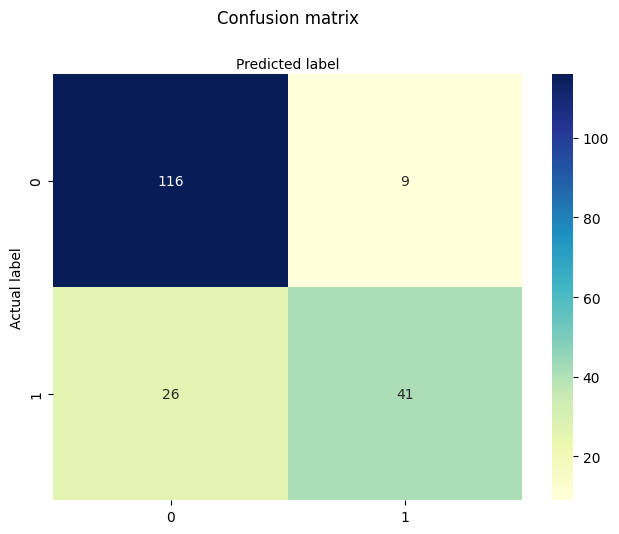

In [8]:
#visualize a confusion matrix with heatmap
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [9]:
#lets print a classification report with the precision, recall, f1 score
from sklearn.metrics import classification_report
target_names=['without diabetes','with diabetes']
print(classification_report(y_test,y_predicted,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



Precision: when your log regression predicts a patient will have diabetes, you are right 82% of the time

Recall: out of all the patients who do have diabetes, your model picked up 61% of them.

F1: weighted average of Precision and Recall. Usually more useful than accuracy, especially if you have an uneven class distribution.

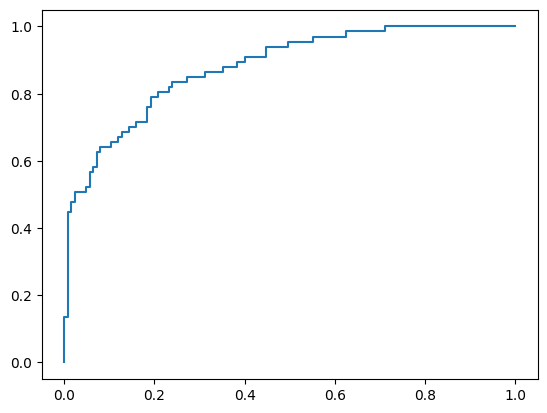

0.8791641791044776


In [10]:
#lets make an ROC Curve, TPR vs FPR (tradeoff between sensitivity and specificty)
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.show()

#lets look at area under curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print(auc)

#quite a good classifier